# Toy Notebook: 1D-Model with adaptation

## Import necessary packages & functions

In [1]:
import numpy as np
import pandas as pd

import matplotlib.ticker as ticker
from matplotlib import cm

import matplotlib.pyplot as plt

# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2

In [2]:
#Import necesarry functions from python-scripts of py-folder

#basic package to run simulation
import py.continuum1d as continuum1d

#package to individually set parameters
from py.params import setParams

#function to compute fixed points of new system & check their stability of w(x)=dirac measure
from py.analysis import computeFPs, checkFixPtsStability

#function that combines the test for static, dynamic & double type of instability
from py.turings import checkStability

#functions that make up the 3d polynomial
from py.turings import c0, c1, c2

#functions that help visualisations of analyses (nullclines, transfer functions, determinant, trace)
from py.analysis import activity_ui, activity_ue, F_a


#import plotting-template - this is NOT necesssary, in this exmple, it's to simplify visualisations
#decomment this line, if you do not have the template available
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

# Run simulations - random initialisation
activity-based, integration via fourier-transform, with adaptation

In [3]:
#init class to run simulation all at once
c1d = continuum1d.continuum1d()

1d Model initialised.


In [4]:
Ie = 0.24
Ii = -0.2
params={'I_e': Ie, 'I_i': Ii, 'b': 0.25, 'end_t': 8*1000}
params=setParams(params)

In [5]:
ue, ui = c1d.run(params, itype='inte_adaptation')

# Run simulation - initialisation around fixed point¶
fixed point of uncoupled system is used for initialisation.

In [13]:
#compute fp-values of uncoupled system.
fps = computeFPs(params)

#per fp, identify the stability in the uncoupled system
stab = checkFixPtsStability(fps, params)

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' %(str(fps), str(stab)))

for the fixed points [[0.1453902  0.40050813]], we have the corresponding stability [1] (1=stable, 0=unstable)


In [14]:
#choose the fixed point for initialisation
fp = fps[0]

In [17]:
#run simulation init. around fp
ue_fp, ui_fp = c1d.run(params, itype='inte_adaptation', fp=fp)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/530389593.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/530389593.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels)


Text(0, 0.5, 'space')

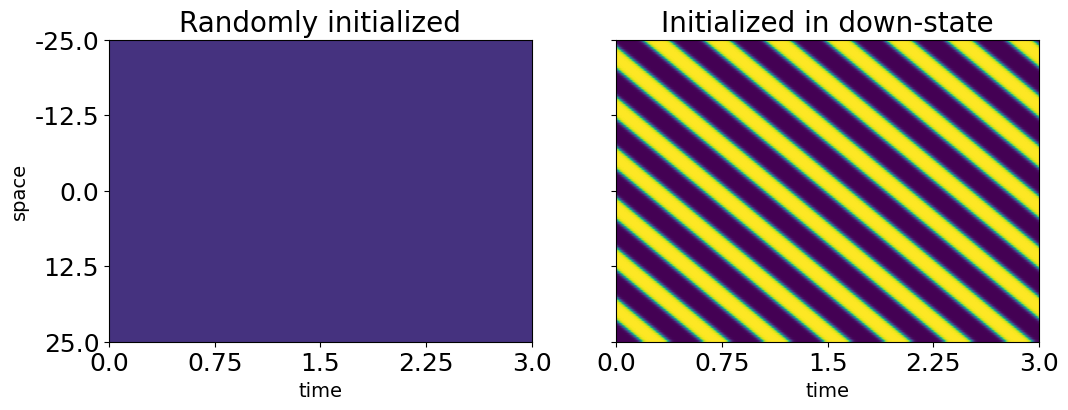

In [18]:
#visualize randomly initialized next to init in fp
fix, (ax0, ax1) = plt.subplots(1, 2, figsize=(12,4), sharey='all')

duration = 3

#plot the corresponding activites
time_labels = np.linspace(0,duration*1000*0.001,5)
space_labels = np.linspace(-params.length/2, params.length/2, 5)

titles = ['Randomly initialized', 'Initialized in down-state']

ax0.imshow(ue.T[:,-int(duration*1000*(1/params.dt)):], vmin=0, vmax=1, aspect='auto')
ax1.imshow(ue_fp.T[:,-int(duration*1000*(1/params.dt)):], vmin=0, vmax=1, aspect='auto')

for idx, ax in enumerate([ax0, ax1]):
    ax.set_title(titles[idx])
    ax.set_xlabel('time', fontsize=14)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels)
    
ax0.set_ylabel('space', fontsize=14)

# Evolution of activity around fixed point

In [19]:
#random nodes
indeces = [24,38,89,110]

#choose which duration of the simulated activity you want to show
#I want to include how it evolves from the init. Therefore, starting point=timestep 0.
duration = [0, 10000] 

## Randomly initialized

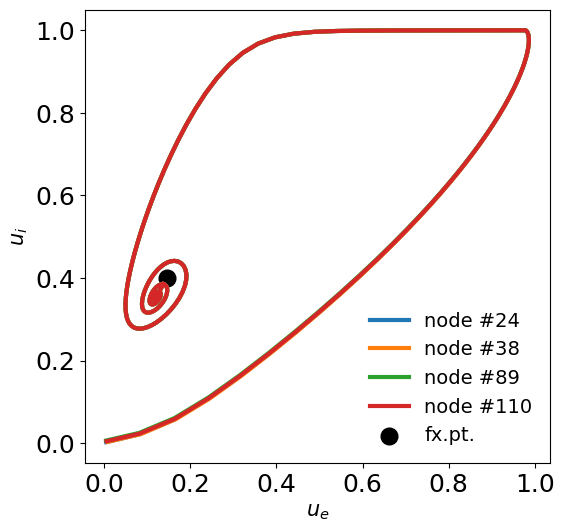

In [20]:
plt.figure(figsize=(6,6))

#cut activity of ue into duration-time
ue_plot = ue.T[:,int(duration[0]):int(duration[1])]
ui_plot = ui.T[:,int(duration[0]):int(duration[1])]

for idx in indeces:
    plt.plot(ue_plot[idx], ui_plot[idx], label='node #%i' %idx)
    
plt.scatter(fp[0], fp[1], label='fx.pt.', c='black')
plt.xlabel(r'$u_e$', fontsize=15)
plt.ylabel(r'$u_i$', fontsize=15)
plt.legend(fontsize=14)

## Initialized in Fixed Point

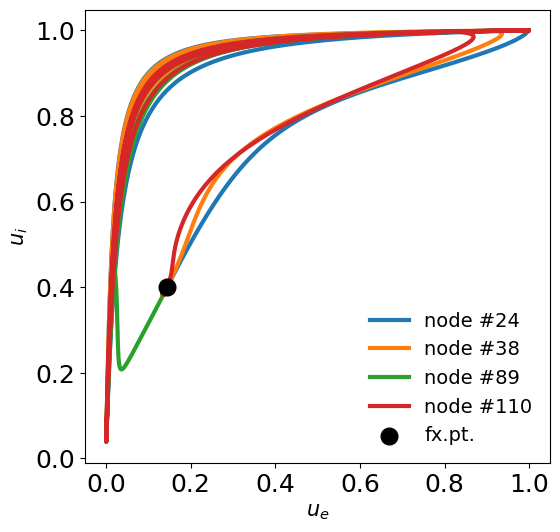

In [21]:
plt.figure(figsize=(6,6))

#cut activity of ue into duration-time
ue_plot_fp = ue_fp.T[:,int(duration[0]):int(duration[1])]
ui_plot_fp = ui_fp.T[:,int(duration[0]):int(duration[1])]

for idx in indeces:
    plt.plot(ue_plot_fp[idx], ui_plot_fp[idx], label='node #%i' %idx)
    
plt.scatter(fp[0], fp[1], label='fx.pt.', c='black', zorder=2)
plt.xlabel(r'$u_e$', fontsize=15)
plt.ylabel(r'$u_i$', fontsize=15)
plt.legend(fontsize=14)

# Nullclines
In the following, we visualise the nullclines & how the activity of  $u_e$ &  $u_i$ evolve around it. To do so, we use the fixed points & nullclines of the uncoupled system while we simulate activity in the coupled system. Since we use the fixed point values of the uncoupled system, the visualisation of the nullclines for this system is done.

Note: The change from the model without adaptation to the model with adaptation has to be considered in the determination of the fixed points. We can make use of the nullclines being defined by the differential equations simulatneously being zero such that from $0=-a+F_a(u_e) \Leftrightarrow a=F_a(u_e)$ the following follows $0=-u_e+F_e(w_{ee}u_e-w_{ei}u_i-ba+I_e) \Leftrightarrow 0=-u_e+F_e(w_{ee}u_e-w_{ei}u_i-bF_a(u_e)+I_e)$. Therefore, we can identify the fixed points $(\bar{u}_e,\bar{u}_i)$ by the two-dimensional system, inserting $a=F_a(u_e)$. The fixed point for the 3-dimensional system is then given by $(\bar{u}_e,\bar{u}_i, F_a(\bar{u}_e))$.

Make no mistake, the stability of $(\bar{u}_e,\bar{u}_i, F_a(\bar{u}_e))$ has to be determined by the (Jacobian of the) 3d-system though!

fp=[0.1543635  0.50552903] has instability static=1, dynamic=1, double=0
fp=[0.98115151 0.99998923] has instability static=0, dynamic=0, double=0
fp=[0.16024895 0.51695078] has instability static=1, dynamic=1, double=0
fp=[0.9810532  0.99998922] has instability static=0, dynamic=0, double=0


/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:50: RuntimeWarning: divide by zero encountered in true_divide
  return params.mu_e - (1/params.beta_e) * np.log((1/y)-1)
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:50: RuntimeWarning: divide by zero encountered in log
  return params.mu_e - (1/params.beta_e) * np.log((1/y)-1)
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:56: RuntimeWarning: divide by zero encountered in true_divide
  return params.mu_a - (1/params.beta_a) * np.log((1/y)-1)
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:56: RuntimeWarning: divide by zero encountered in log
  return params.mu_a - (1/params.beta_a) * np.log((1/y)-1)
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:53: RuntimeWarning: divide by zero encountered in true_divide
  return params.mu_i - (1/params.beta_i) * np.log((1/y)-1)
/Users/ronja/Documents/GitHub/neural-fields/py/analysis.py:53: RuntimeWarning: divide by zero encountered in log
  r

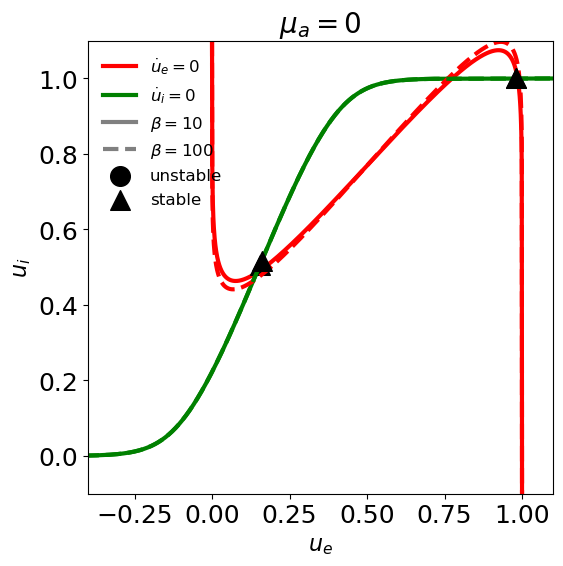

In [33]:
betas = [10, 100]
plt.figure(figsize=(6,6))

for l, beta in enumerate(betas):
    ee = 0.5
    ii = -0.05

    params={'I_e': ee, 'I_i': ii, 'b': 0.25, 'end_t': 8*1000, 'tau_a': 600, 'mu_a': 0.4, 'beta_a': beta}

    params = setParams(params)
    fps = computeFPs(params)
    stab = checkFixPtsStability(fps, params)
    
    u = np.linspace(0,1,1201)
    zero_line = np.linspace(0,0,len(u))

    #use property c0=0 ('has zero-eigenvalue' - Curtu & Ermentrout 2004)
    k=np.linspace(0,2,501)

    for fp in fps:
        static, dynamic, double = checkStability(k, fp, params)
        print('fp=%s has instability static=%i, dynamic=%i, double=%i' %(str(fp), static, dynamic, double))
    
    markers = ['o', '^']
    lines = ['solid', 'dashed', 'dotted']
    labels=['unstable', 'stable']
    
    nc_ui = activity_ui(u, params)
    nc_ue = activity_ue(u, params)
    
    if nc_ui[1]<1:
        nc_ui[0] = 1.1
    if nc_ui[-2]>0:
        nc_ui[-1] = -0.1
    
    if nc_ue[1]>0:
        nc_ue[0] = -0.1
    if nc_ue[-2]<1:
        nc_ue[-1] = 1.1
        
    
    plt.plot(u,nc_ui, c='red', ls=lines[l])
    plt.plot(nc_ue,u, c='green', ls=lines[l])

    for i, fp in enumerate(fps):
        plt.scatter(fp[0], fp[1], s=200, zorder=2, marker=markers[stab[i]], c='black')

    

    
plt.plot(0,0, c='red', label=r'$\dot{u}_e=0$')
plt.plot(0,0, c='green', label=r'$\dot{u}_i=0$')
plt.plot(0,0, c='gray', ls='solid', label=r'$\beta=%i$' %betas[0])
plt.plot(0,0, c='gray', ls='dashed', label=r'$\beta=%i$'%betas[1])

plt.scatter(-100,-100, s=200, zorder=0, marker=markers[0], c='black', label='unstable')
plt.scatter(-100,-100, s=200, zorder=0, marker=markers[1], c='black', label='stable')

plt.xlabel(r'$u_e$', fontsize=16)
plt.ylabel(r'$u_i$', fontsize=16)
    

plt.legend(loc='upper left', fontsize=12)
plt.title(r'$\mu_a=%i$' %params.mu_a)

plt.xticks()#(fontsize=14)
plt.yticks()#(fontsize=14)

plt.xlim([-0.4, 1.1])
plt.ylim([-0.1, 1.1])
plt.show()

# Investigation of the state space - default setting
Certain aspects of the analysis were already computed for the default setting. Therefore, one can call 'default.csv' to import the pandas-dataframe the contains the information/quantities which were already determined. State space for $(I_e, I_i)\in[0,1]^2$.

In [34]:
path = '/Users/ronja/opt/anaconda3/lib/python3.9/site-packages/matplotlib/mpl-data/stylelib/'
plt.style.use(path + 'template.mplstyle')

def setAxes(df, nmb):
    
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    nmb_labels = 5
                
    idx_x = np.linspace(0,len(df.columns.values)-1, nmb_labels).astype(int)
    idx_y = np.linspace(0,len(df.index.values)-1, nmb_labels).astype(int)
        
    xliste= np.round(df.columns.values, decimals=2)[idx_x]
    yliste= np.round(df.index.values, decimals=2)[idx_y]
    
    xlabels=list('%.1f'%(e) for e in xliste)
    ylabels=list('%.1f'%(e) for e in yliste)
    
    return xlabels, ylabels

def plotDiscreteMap(df, xaxis='I_e', yaxis='I_i', scatters=False,
                    title='State space with adaptation', colorbar=True):
    
    p_colors = cm.get_cmap('Accent', 4)
    
    stabis = df.pivot_table('stability', columns=xaxis, index=yaxis)
    statics = df.pivot_table('static', columns=xaxis, index=yaxis)
    dynamics = df.pivot_table('dynamic', columns=xaxis, index=yaxis)
    doubles = df.pivot_table('double', columns=xaxis, index=yaxis)
    p_randoms = df.pivot_table('p_random', columns=xaxis, index=yaxis)
    p_downs = df.pivot_table('p_down', columns=xaxis, index=yaxis) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
    compare = p_randoms.eq(p_downs) #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
    
    fig, ax = plt.subplots(1,1,figsize=(8,8))
    
    unstable_color = 'white'
    stable_color='black'
    
    nmb_labels = 5
                
    xlabels, ylabels = setAxes(stabis, nmb_labels)
    
    pos = ax.imshow(p_randoms, origin='lower', vmin=1, vmax=4, aspect='auto', cmap=p_colors, alpha=0.7) #
    c1 = ax.contour(stabis, origin='lower', vmin=0, vmax=2, levels=1, 
                    colors=[unstable_color, stable_color, 'green'])
    c2 = ax.contour(statics, origin='lower', vmin=0, vmax=1, levels=0, 
                    colors=[unstable_color], linestyles='dashed')
    c22 = ax.contour(dynamics, origin='lower', vmin=0, vmax=1, levels=0, 
                    colors=['gray'], linestyles='dashed')
    c3 = ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors=[stable_color], 
               linestyles='dashed') #kommentiere diese zeile aus, falls multistabi nicht erhoben wird
    
   
    h1,l1 = c1.legend_elements()
    h2,l1 = c2.legend_elements()
    h22,l1 = c22.legend_elements()
    h3,l1 = c3.legend_elements()
    plt.legend([h1[0], h1[1], h2[0], h22[0], h3[0]], ['Hopf', 'Bistable', 'Static', 'Dynamic', 'Multi'], 
               loc='upper left')
    ax.set_title(title)
    
    
    markers = ['X', 'D', 's', 'o', 'P', '^']
    count=0
    if not scatters.any()==False:
        for scatter in scatters:
            scatter0 = stabis.columns.values.flat[np.abs(stabis.columns.values - scatter[0]).argmin()]#findNearest(stabis.index.values, scatter[0])
            scatter1 = stabis.index.values.flat[np.abs(stabis.index.values - scatter[1]).argmin()] #findNearest(stabis.index.values, scatter[1])
            xnodes = np.linspace(0, len(stabis.columns.values)-1, len(stabis.columns.values))
            ynodes = np.linspace(0, len(stabis.index.values)-1, len(stabis.index.values))
            ax.scatter(xnodes[list(stabis.columns.values).index(scatter0)], 
                       ynodes[list(stabis.index.values).index(scatter1)], 
                       s=250, c='blue', marker=markers[count], zorder=2) 
            count+=1
        
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels, fontsize=12)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels, fontsize=12)
    
    ax.set_xlabel(r'$%s$' %xaxis)
    ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0)
    
    ax.label_outer()
    
    mini = 1
    maxi = 4
    cbar_ticks=np.linspace(mini,maxi,4)
    cbar_ticks=np.around(cbar_ticks, decimals=0)
    cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']
    
    if colorbar:
        # Create colorbar
        cb_ax = fig.add_axes([.93,.126,.04,.754])
        cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel('pattern-type', rotation=-90, va="bottom")
        cbar.ax.set_yticklabels(cbar_labels, rotation=-90)
        cbar.minorticks_off()
    
    
    plt.show()

In [35]:
df = pd.read_csv('csv/adaps-explo/high-adaps.csv')

Set $\texttt{scatter=[[I_e, I_i], [...]]}$ to position markers at the positions you're interested in, e.g. if you want to take look at a certain parametrization for which you have both bistability in the uncoupled system, but Turing instability in the down-state (as below)

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/3874459381.py:47: UserWarning: No contour levels were found within the data range.
  c2 = ax.contour(statics, origin='lower', vmin=0, vmax=1, levels=0,
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/3874459381.py:49: UserWarning: No contour levels were found within the data range.
  c22 = ax.contour(dynamics, origin='lower', vmin=0, vmax=1, levels=0,
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/3874459381.py:51: UserWarning: No contour levels were found within the data range.
  c3 = ax.contour(compare, origin='lower', vmin=0, vmax=1, levels=0, colors=[stable_color],
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/3874459381.py:81: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels, fontsize=12)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/3874459381.py:83: UserWarning: FixedFormatter should onl

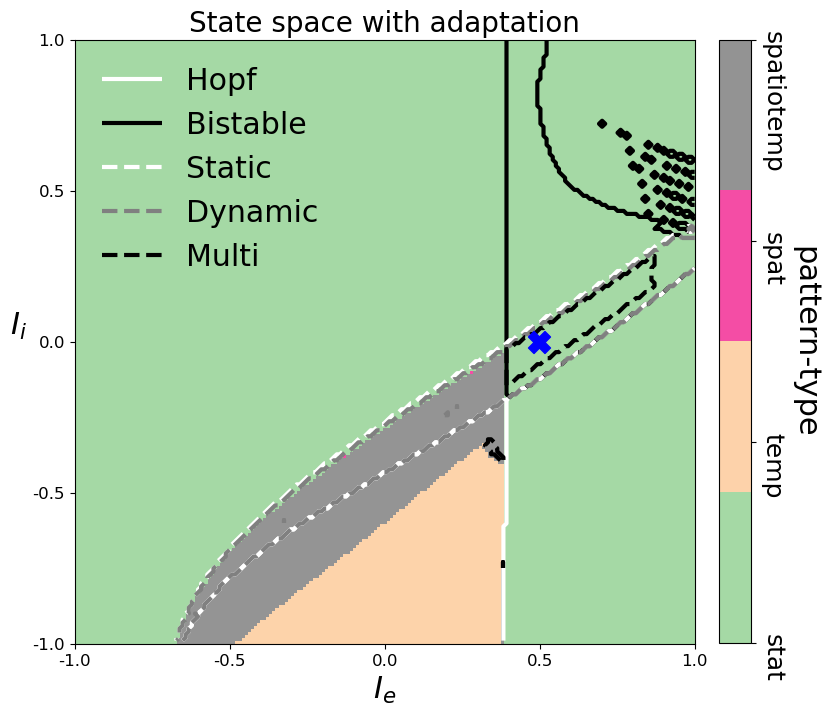

In [36]:
Ie= 0.5
Ii= 0.0

plotDiscreteMap(df, scatters=np.array([[Ie, Ii]]))

# Visualise violation type

A stable fixed point of the uncoupled system can undergo "different types of bifurcations" ("lose stability"), which is detectable by an extended analysis (i.e. pattern formation in the coupled system by identification of Turing-/Turing-Hopf instability). 

For approaches, see either Harris & Ermentrout 'Traveling waves in a spatially-distributed Wilson–Cowan model of cortex: From fronts to pulses' (2018), or Wyller et al 'Turing instability and pattern formation in a two-population neuronal network model' (2007).

We did have to adjust the stability analysis to the 3-dimensional system with adaptation though. For that we used the help of Curtu & Ermentrout (2004) 'Pattern Formation in a Network of Excitatory and Inhibitory Cells with Adaptation'. They make use of the fact, that the Eigenvalues of a 3-dimensional Jacobian matrix are determined by a 3-dimensional Polynomial, i.e. a cubic polynomial. Therefore, we can 'check' certain conditions to determine the type of occuring instability.

We will use the above chosen setting (blue $\textbf{X}$ in state space).

Note: We have to determine the violation type for each fixed point. For the chosen setting, we have 3 fixed points  $\to$ do the same 3 times.

In [37]:
params = {'I_e': Ie, 'I_i': Ii, 'b': 0.25, 'mu_a': 0.4, 'beta_a': 10, 'end_t': 5*1000}

params = setParams(params)

#compute fp-values of uncoupled system.
fps = computeFPs(params)

#per fp, identify the stability in the uncoupled system
stab = checkFixPtsStability(fps, params)

print('for the fixed points %s, we have the corresponding stability %s (1=stable, 0=unstable)' %(str(fps), str(stab)))

for the fixed points [[0.13335441 0.49415868]
 [0.9811507  0.99999161]], we have the corresponding stability [1, 1] (1=stable, 0=unstable)


## Types of instability
The characteristic polynomial of the Jacobian matrix $A_3(k)|_{(\bar{u}_e,\bar{u}_i,F_a(\bar{u}_e))}$ has the form

$P(\lambda) = \lambda^3+c_2(k)\lambda^2+c_1(k)\lambda+c_0(k)$.

The fixed point $(\bar{u}_e,\bar{u}_i,F_a(\bar{u}_e)$ remains stable, if the real part of all Eigenvalues $\lambda_0,\ \lambda_1,\ \lambda_2$ remains really negative. This is not the case if one of the following happens:

There is a $k_0>0$ such that
1. $c_0(k_0)=0\ \Rightarrow\ P(\lambda)$ has a zero-Eigenvalue. We call this Turing instability $\textit{static}$. 
2. $c_2(k_0)c_1(k_0)-c_0(k_0)=0\ \Rightarrow\ P(\lambda)$ has an imaginary-Eigenvalue. We call this Turing instability $\textit{dynamic}$. 
3. $c_1(k_0)=0=c_0(k_0)\ \Rightarrow\ P(\lambda)$ has a double-zero-Eigenvalue. This type of instability is a Takens-Bogdanov instability. (We call it short-hand $\textit{double}$.) 

In [38]:
#set the range for increasing wavenumber k
k = np.linspace(-3,3,801)
zero_line = np.linspace(0, 0, len(k))

In [39]:
#check stability for donw-state
fp= fps[0]

c_20 = c2(k, fp, params)
c_10 = c1(k, fp, params)
c_00 = c0(k, fp, params)

cs0 = [c_00, c_10, c_20]

static0, dynamic0, double0 = checkStability(k, fp, params)

print('For fixed point %s, we have the (in-)stability' %str(fp))
print('1. static: %i (0=no, 1=yes)' %static0)
print('2. dynamic: %i (0=no, 1=yes)' %dynamic0)
print('3. double: %i (0=no, 1=yes)' %double0)


#again for visualisation reasons: let the simulation run, init. around fp:
ue0, ui0 = c1d.run(params, itype = 'inte_adaptation', fp=fp)

For fixed point [0.13335441 0.49415868], we have the (in-)stability
1. static: 1 (0=no, 1=yes)
2. dynamic: 1 (0=no, 1=yes)
3. double: 0 (0=no, 1=yes)


In [40]:
#check stability for saddle node
fp= fps[1]

c_21 = c2(k, fp, params)
c_11 = c1(k, fp, params)
c_01 = c0(k, fp, params)

cs1= [c_01, c_11, c_21]


print('For fixed point %s, we have instability' %str(fp))
print('Therefore, we don\'t check, if it loses stability under consideration of a spatial perturbation...')
print('It already is unstable :D')


#again for visualisation reasons: let the simulation run, init. around fp:
ue1, ui1 = c1d.run(params, itype = 'inte_adaptation', fp=fp)

For fixed point [0.9811507  0.99999161], we have instability
Therefore, we don't check, if it loses stability under consideration of a spatial perturbation...
It already is unstable :D


In [41]:
#check stability for up-state
fp= fps[-1]

c_22 = c2(k, fp, params)
c_12 = c1(k, fp, params)
c_02 = c0(k, fp, params)

cs2 = [c_02, c_12, c_22]

static2, dynamic2, double2 = checkStability(k, fp, params)

print('For fixed point %s, we have the (in-)stability' %str(fp))
print('1. static: %i (0=no, 1=yes)' %static2)
print('2. dynamic: %i (0=no, 1=yes)' %dynamic2)
print('3. double: %i (0=no, 1=yes)' %double2)

#again for visualisation reasons: let the simulation run, init. around fp:
ue2, ui2 = c1d.run(params, itype = 'inte_adaptation', fp=fp)

For fixed point [0.9811507  0.99999161], we have the (in-)stability
1. static: 0 (0=no, 1=yes)
2. dynamic: 0 (0=no, 1=yes)
3. double: 0 (0=no, 1=yes)


/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/4274112987.py:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=time_labels)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/4274112987.py:47: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=space_labels)


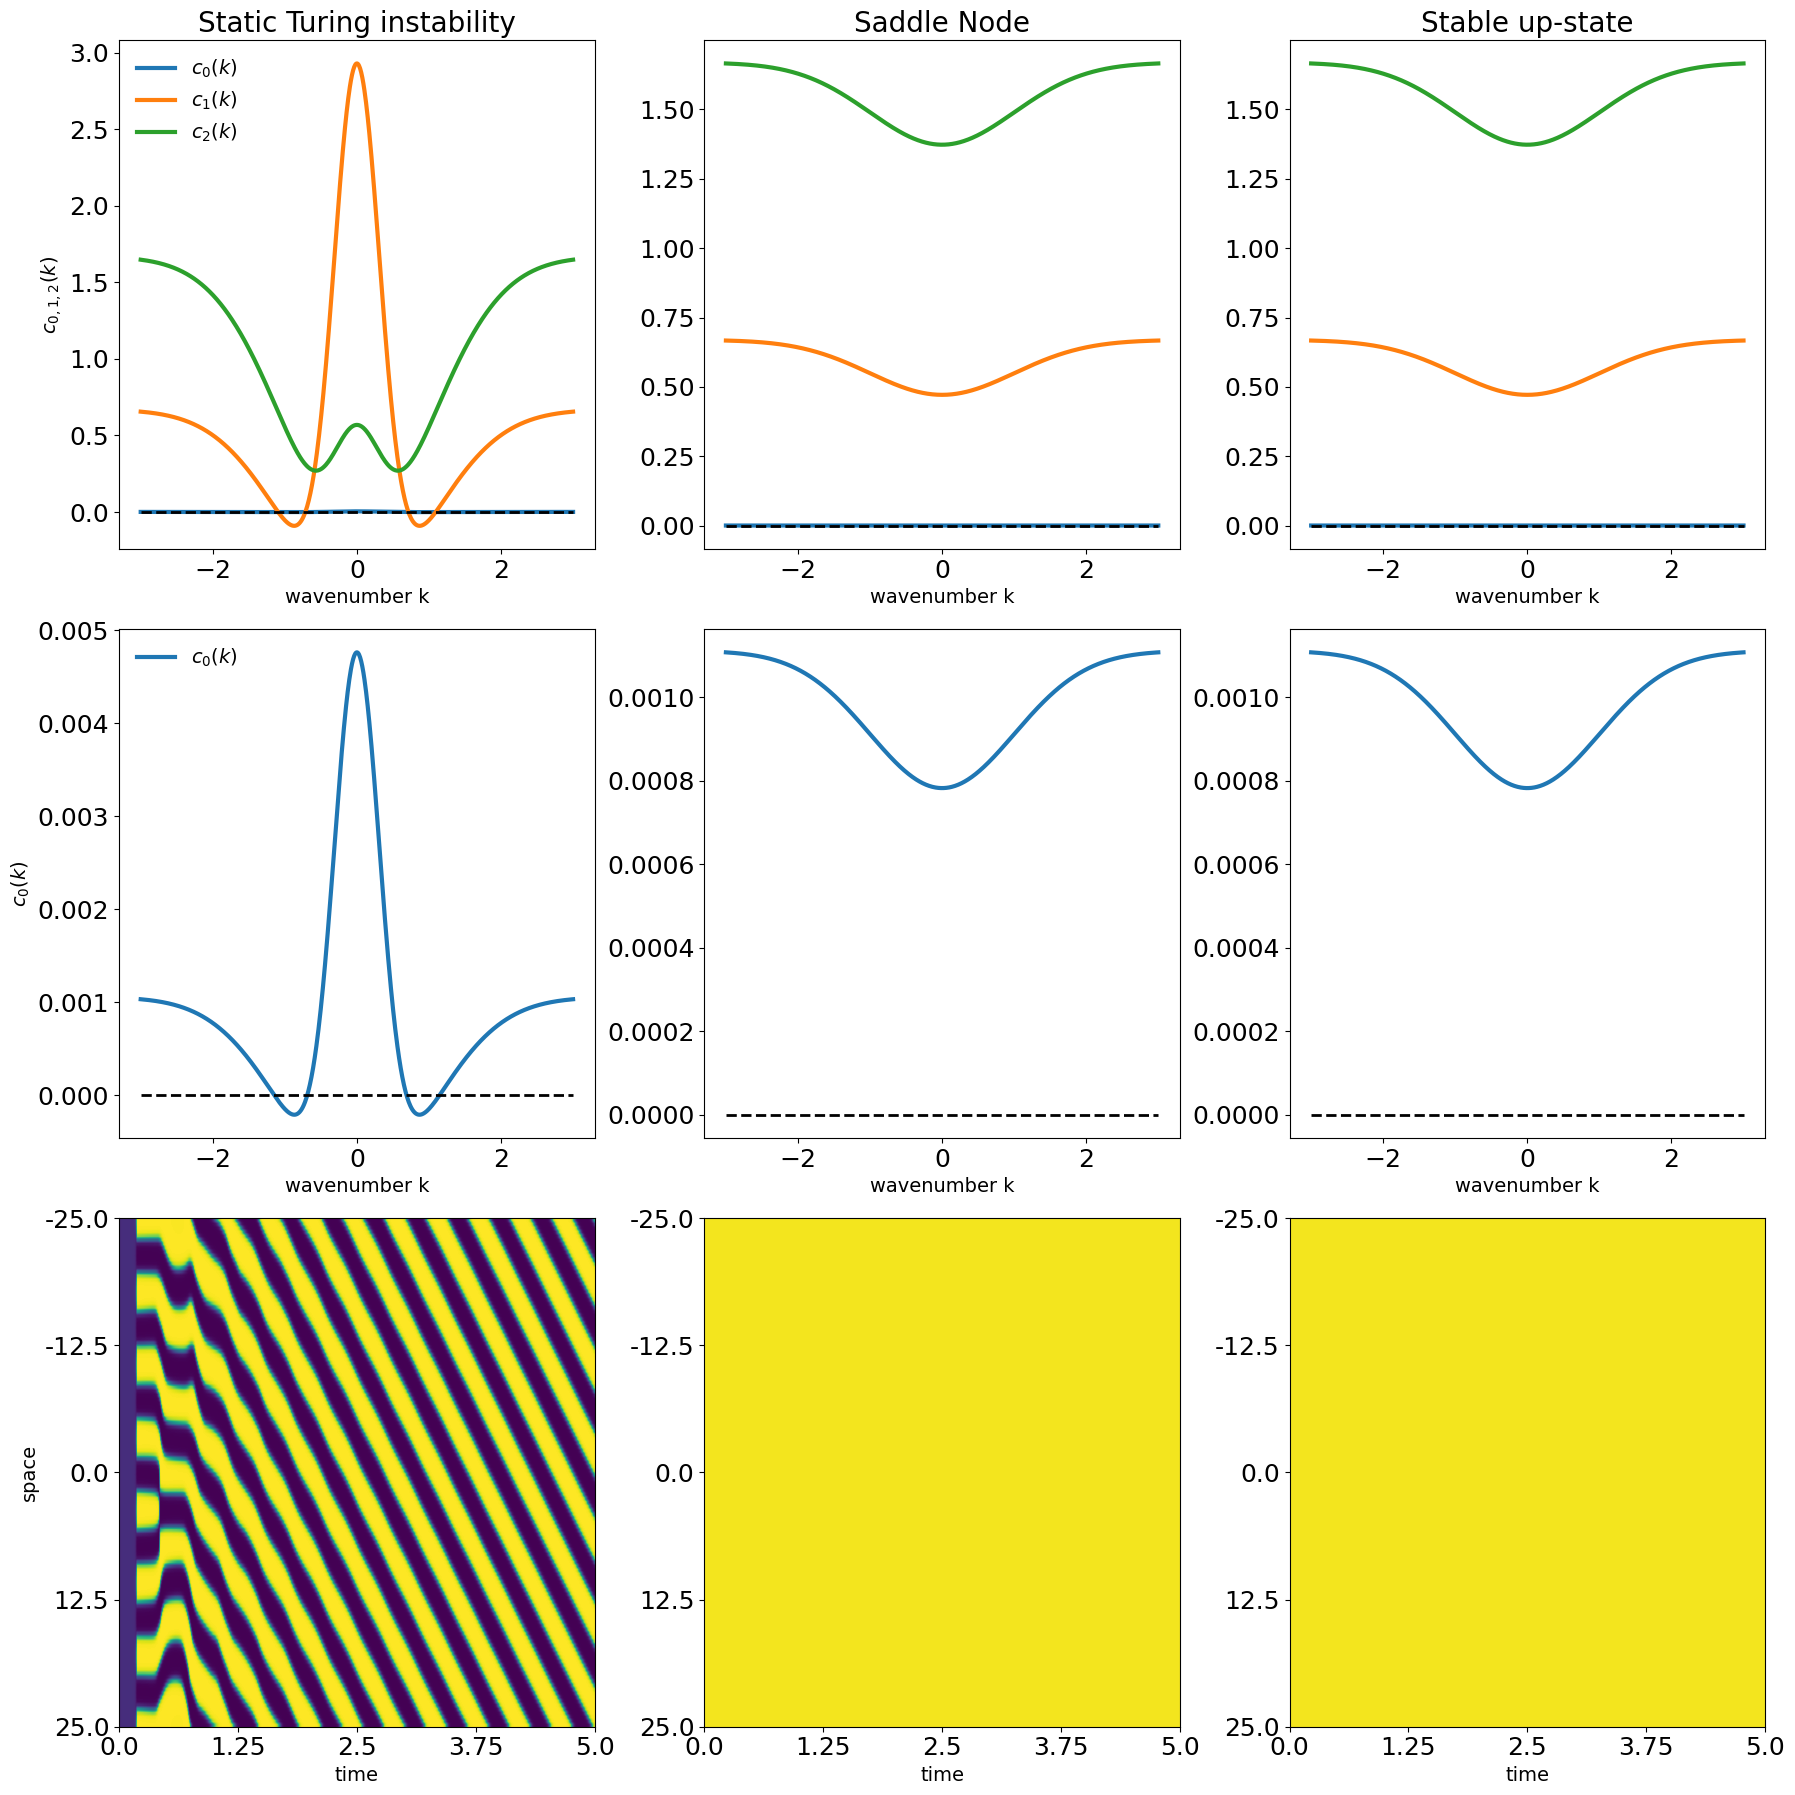

In [42]:
fig, ((ax0, ax1, ax2), (ax3, ax4, ax5), (ax6, ax7, ax8)) = plt.subplots(3, 3, figsize=(18,18))

zero_line = np.linspace(0,0, len(k))

row1 = [ax0, ax1, ax2]
row2 = [ax3, ax4, ax5]
row3 = [ax6, ax7, ax8]
all_cs = [cs0, cs1, cs2]
all_c0s = [c_00, c_01, c_02]
all_ues = [ue0, ue1, ue2]

titles = ['Static Turing instability', 'Saddle Node', 'Stable up-state']

#plot the c-functions per state over k
for idx, ax in enumerate(row1):
    for i, c in enumerate(all_cs[idx]):
        ax.plot(k, c, label=r'$c_%i(k)$' %i)
        
    ax.plot(k, zero_line, ls='dashed', c='black', lw=2)
    ax.set_title(titles[idx])
    ax.set_xlabel('wavenumber k', fontsize=14)
    
ax0.legend(loc='upper left', fontsize=14)
ax0.set_ylabel(r'$c_{0,1,2}(k)$', fontsize=14)

#plot a close-up of c_0 per state
for idx, ax in enumerate(row2):
    ax.plot(k, all_c0s[idx], label=r'$c_0(k)$')
    ax.plot(k, zero_line, ls='dashed', c='black', lw=2)
    #ax.set_title(titles[idx])
    ax.set_xlabel('wavenumber k', fontsize=14)
    

ax3.legend(loc='upper left', fontsize=14)
ax3.set_ylabel(r'$c_0(k)$', fontsize=14)
    
#plot the corresponding activites
time_labels = np.linspace(0,params.end_t*0.001,5)
space_labels = np.linspace(-params.length/2, params.length/2, 5)

for idx, ax in enumerate(row3):
    ax.imshow(all_ues[idx].T, vmin=0, vmax=1, aspect='auto')
    ax.set_xlabel('time', fontsize=14)
    ax.xaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_xticklabels(labels=time_labels)
    ax.yaxis.set_major_locator(ticker.LinearLocator(5))
    ax.set_yticklabels(labels=space_labels)
    
ax6.set_ylabel('space', fontsize=14)
    
fig.tight_layout(pad=0.5)

# Exploration of the adaptation state space and its' parameters
## Temporal frequencies in the state space

In the following we plot the dominant temporal frequency per external input values $(I_e, I_i)\in[-1,1]^2$ for which we have spatiotemporal patterns (i.e. traveling waves) if the system was initialised in the down-state.

In [43]:
time_frequs = pd.read_csv('csv/adaps-explo/high-adaps_temp_frequs.csv')

In [44]:
def plotMap(df, xaxis='I_e', yaxis='I_i', scatter=False,
                    title='Dominant frequencies', colorbar=True,
                   plotty = 'dom_frequ', colorbar_title = 'dominant frequ.'):
    
    p_colors = cm.get_cmap('Accent', 4)
    
    plots = df.pivot_table(plotty, columns=xaxis, index=yaxis)
    
    fig, ax = plt.subplots(1,1,figsize=(6,6), dpi=160)

    nmb_labels = 5
                
    xlabels, ylabels = setAxes(plots, nmb_labels)
    
    vals=df[plotty].to_numpy()
    mini = min(vals)
    if any(np.isinf(vals)):
        maxi=7
    else:
        maxi = 6#max(vals)
    
    pos = ax.imshow(plots, origin='lower', vmin=mini, vmax=maxi, aspect='auto', cmap='viridis')
    
    ax.set(title=title)
     
    # Add minorticks on the colorbar to make it easy to read the
    # values off the colorbar.
    
    ax.xaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_xticklabels(labels=xlabels, fontsize=25)
    ax.yaxis.set_major_locator(ticker.LinearLocator(nmb_labels))
    ax.set_yticklabels(labels=ylabels, fontsize=25)
    
    ax.set_xlabel(r'$%s$' %xaxis, fontsize=25)
    ax.set_ylabel(r'$%s$' %yaxis, labelpad=10, rotation=0, fontsize=25)
    
    ax.label_outer()
    
    cbar_ticks=np.linspace(mini,maxi,4)
    cbar_ticks=np.around(cbar_ticks, decimals=0)
    cbar_labels=['stat', 'temp', 'spat', 'spatiotemp']
    
    if colorbar:
        # Create colorbar
        cb_ax = fig.add_axes([.93,.126,.04,.754])
        cbar = ax.figure.colorbar(pos, ax=ax, ticks=cbar_ticks, cax=cb_ax)
        cbar.ax.set_ylabel(colorbar_title, rotation=-90, va="bottom", fontsize=25)
   #     cbar.ax.set_yticklabels(cbar_labels, rotation=-90)
        
        
        cbar.minorticks_on()
        
    
        
#    plt.legend(loc='lower right')
    
    
    
    plt.show()

/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/2087490988.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(labels=xlabels, fontsize=25)
/var/folders/8l/w8cdnkkj38bg2pscx__1vxth0000gn/T/ipykernel_1923/2087490988.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels=ylabels, fontsize=25)


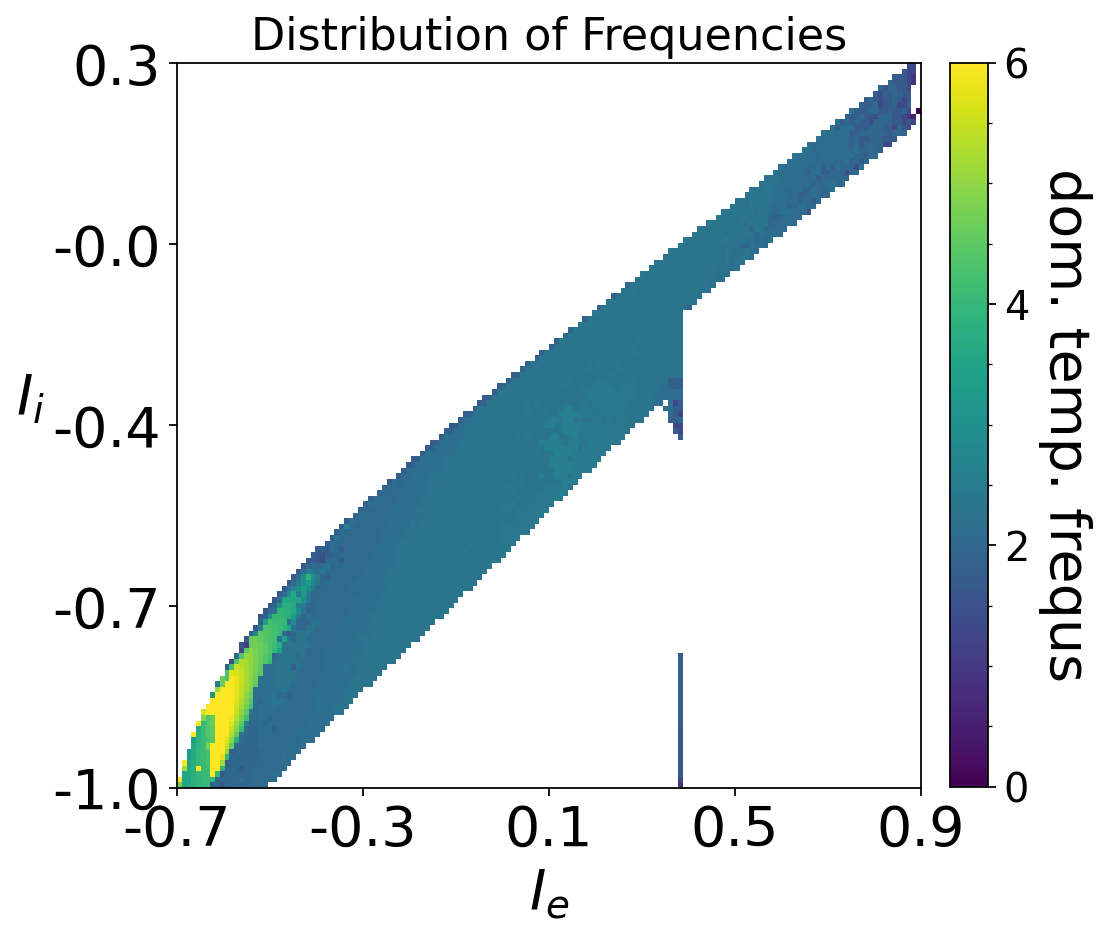

In [45]:
plotMap(time_frequs, title='Distribution of Frequencies', 
                plotty='dom_frequ', colorbar = True, colorbar_title='dom. temp. frequs')

We want to explore how $b$ and $\tau_a$ change the traveling waves. This helps us to identify, which ranges make the most sense. I do this for two different adaptation-dataframes: Once with $\mu_a=0=\mu_{e,i},\ \beta_a=5=\beta_{e,i}$. The other one if for the same setting as the state space shown above, with $\mu_a=0.4,\ \beta_a=10$. I start with $b=0.25,\ \tau_a=600$. For these, I identify parameterizations for which we have bistability without adaptation and 

(i) Bistability with adaptation, static Turing-instability in down with p_random=1, p_down=4 $\\ $
(ii) Bistability with adaptation, no Turing-instability with p_random=1, p_down=4 $\to$ "boundary effect"? $\\ $
(iii) Monostability with adaptation, p_random=p_down=4 $\\ $
(iv) Multistability with adaptation, p_random=1, p_down=4 $\\ $

In [46]:
#these settings are for resolution: 101x101; csv: high_default, adaps_101x101; \mu_a=0, \beta_a=5.
dic = {'(i)': [[0.42, -0.1]],
       '(ii)': [[0.4, -0.08]],
       '(iii)': [[0.24, -0.22]],
       '(iv)': [[0.26, -0.2]]}
cases = pd.DataFrame(data=dic)
cases

,(i),(ii),(iii),(iv)
0,"[0.42, -0.1]","[0.4, -0.08]","[0.24, -0.22]","[0.26, -0.2]"


In [47]:
bi = pd.read_csv('csv/b_a_df_trial.csv')
bii = pd.read_csv('csv/ii_b_a_df_trial.csv')
biii = pd.read_csv('csv/iii_b_a_df_trial.csv')
biv = pd.read_csv('csv/iv_b_a_df_trial.csv')

taui = pd.read_csv('csv/tau_a_df_trial.csv')
tauii = pd.read_csv('csv/ii_tau_a_df_trial.csv')
tauiii = pd.read_csv('csv/iii_tau_a_df_trial.csv')
tauiv = pd.read_csv('csv/iv_tau_a_df_trial.csv')

In [48]:
def plotDataFrames(dfList1, dfList2):
    
    labels = ['(i)', '(ii)', '(iii)', '(iv)']
    colors = ['navy', 'mediumblue', 'dodgerblue', 'skyblue'] #cm.get_cmap('winter', 4)
    
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18,6))
    
    ax0.set_title('dom. temp. frequ. [Hz]')
    ax1.set_title('down duration ' + r'$[\frac{ratio}{oscillation}]$')
    ax2.set_title('up duration ' + r'$[\frac{ratio}{oscillation}]$')
    
    for idx, b_df in enumerate(dfList1):
        b_df.plot(ax=ax0, x='b',  y='dom_frequ', c=colors[idx],
                  label='case %s' %labels[idx])
        
        b_df.plot(ax=ax1, x='b',  y='down_duration_ratio', c=colors[idx],
                  label='case %s' %labels[idx])
        
        b_df.plot(ax=ax2, x='b',  y='up_duration_ratio', c=colors[idx],
                  label='case %s' %labels[idx])
    
    ax1.set_ylim([-0.1,3])
    ax2.set_ylim([-0.1,3])
    
    for ax in [ax0, ax1, ax2]:
        ax.set_xlabel(r'$b$')
    
    plt.show()
                                        
        
    fig, (ax0, ax1, ax2) = plt.subplots(1, 3, figsize=(18,6)) 
    
    ax0.set_title('dom. temp. frequ. [Hz]')
    ax1.set_title('down duration ' + r'$[\frac{ratio}{oscillation}]$')
    ax2.set_title('up duration ' + r'$[\frac{ratio}{oscillation}]$')
    
    for idx, tau_df in enumerate(dfList2):
        tau_df.plot(ax=ax0, x='tau_a', y='dom_frequ', c=colors[idx],
                    label='case %s' %labels[idx])
        
        tau_df.plot(ax=ax1, x='tau_a', y='down_duration_ratio', c=colors[idx],
                    label='case %s' %labels[idx])
        
        tau_df.plot(ax=ax2, x='tau_a', y='up_duration_ratio', c=colors[idx],
                    label='case %s' %labels[idx])
        
    
    ax1.set_ylim([-0.1,1.1])
    ax2.set_ylim([-0.1,1.1])
    
    for ax in [ax0, ax1, ax2]:
        ax.set_xlabel(r'$\tau_a$')
    
    plt.show()

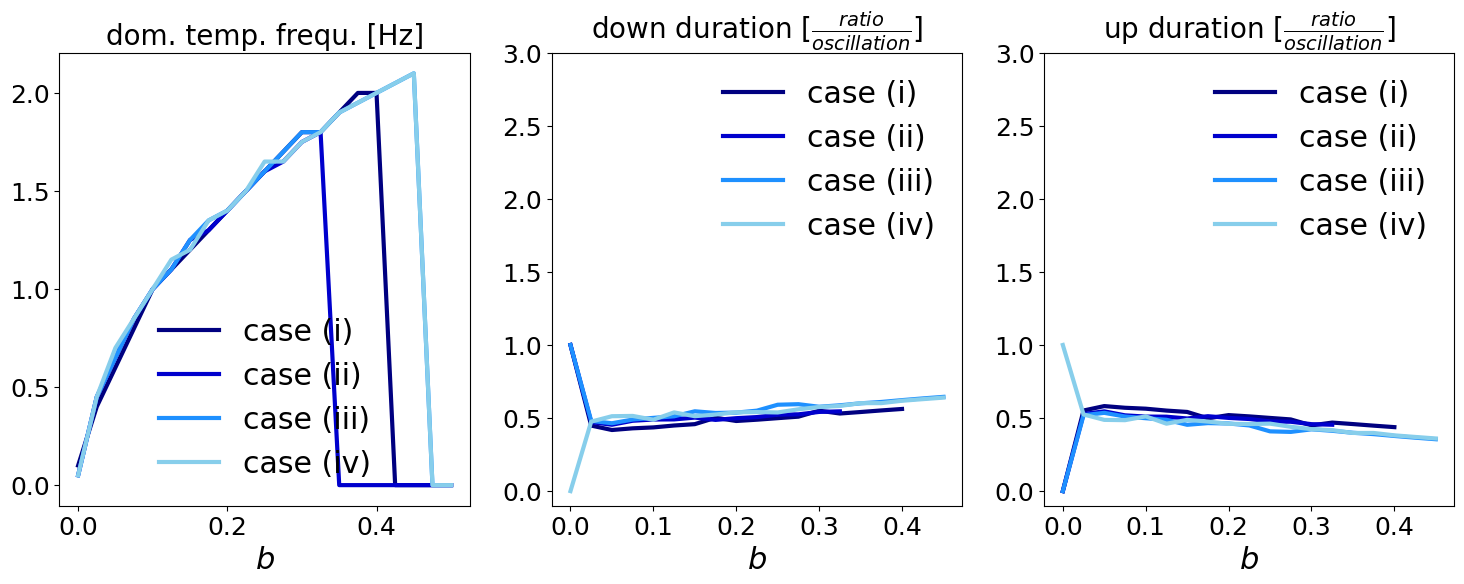

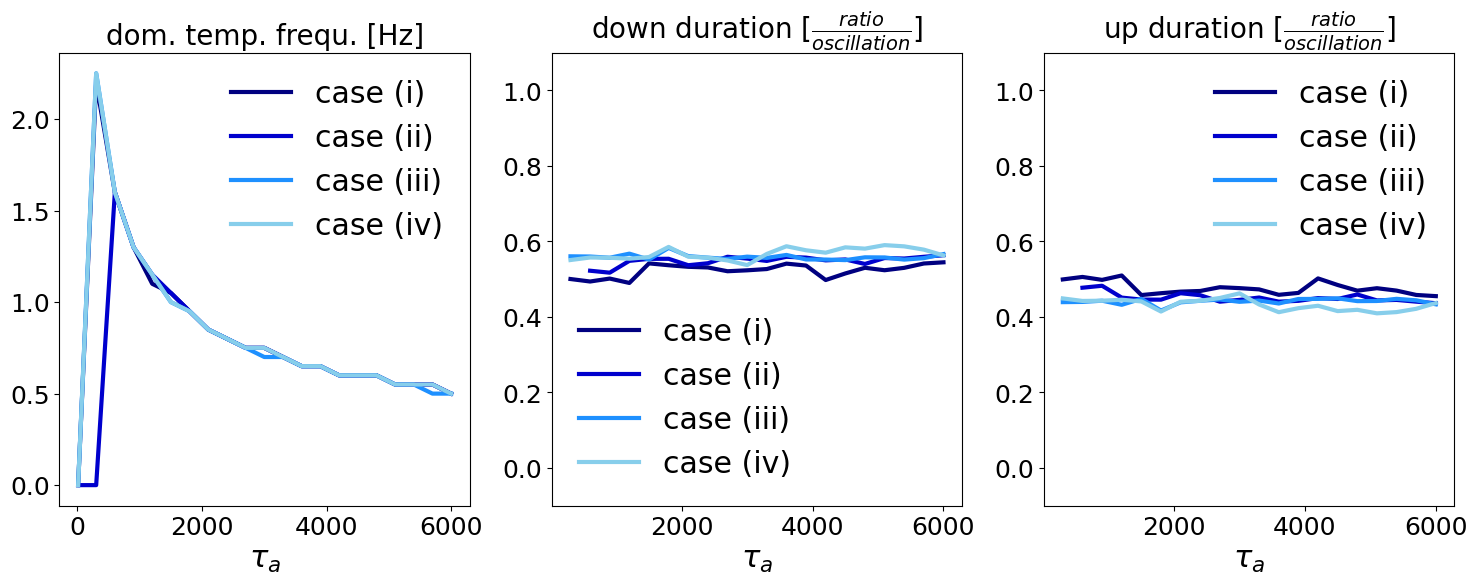

In [49]:
plotDataFrames([bi, bii, biii, biv], [taui, tauii, tauiii, tauiv])

Note: Case (ii) different: Bistable without & with adaptation, static and dynamic Turing instability.

In [50]:
#these settings are for resolution: 201x201; csv: high_default, high-adaps; \mu_a=0.4, \beta_a=10.
dic = {'(i)': [[0.47, 0.01]],# [0.72, 0.16]], 
       '(ii)': [[0.4, -0.14]], #[0.86, 0.27]], 
       '(iii)': [[0.2, -0.25]], #[0.38, -0.04]], 
       '(iv)': [[0.39, -0.04]]}, #[None, None]]}
cases = pd.DataFrame(data=dic)
cases

,(i),(ii),(iii),(iv)
0,"[[0.47, 0.01]]","[[0.4, -0.14]]","[[0.2, -0.25]]","[[0.39, -0.04]]"


In [51]:
bi2 = pd.read_csv('csv/i_b_df.csv')
bii2 = pd.read_csv('csv/ii_b_df.csv')
biii2 = pd.read_csv('csv/iii_b_df.csv')
biv2 = pd.read_csv('phase_lats/case_iv_b.csv')

taui2 = pd.read_csv('csv/i_tau_a_df.csv')
tauii2 = pd.read_csv('csv/ii_tau_a_df.csv')
tauiii2 = pd.read_csv('csv/iii_tau_a_df.csv')
tauiv2 = pd.read_csv('phase_lats/case_iv_tau.csv')

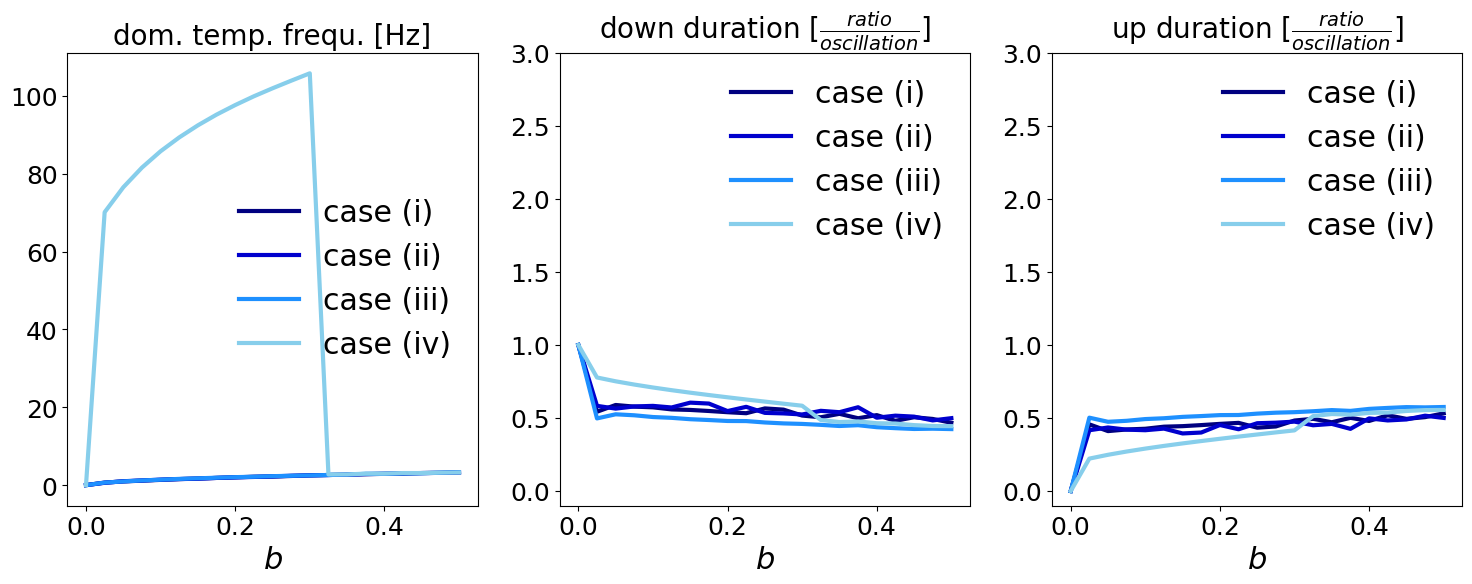

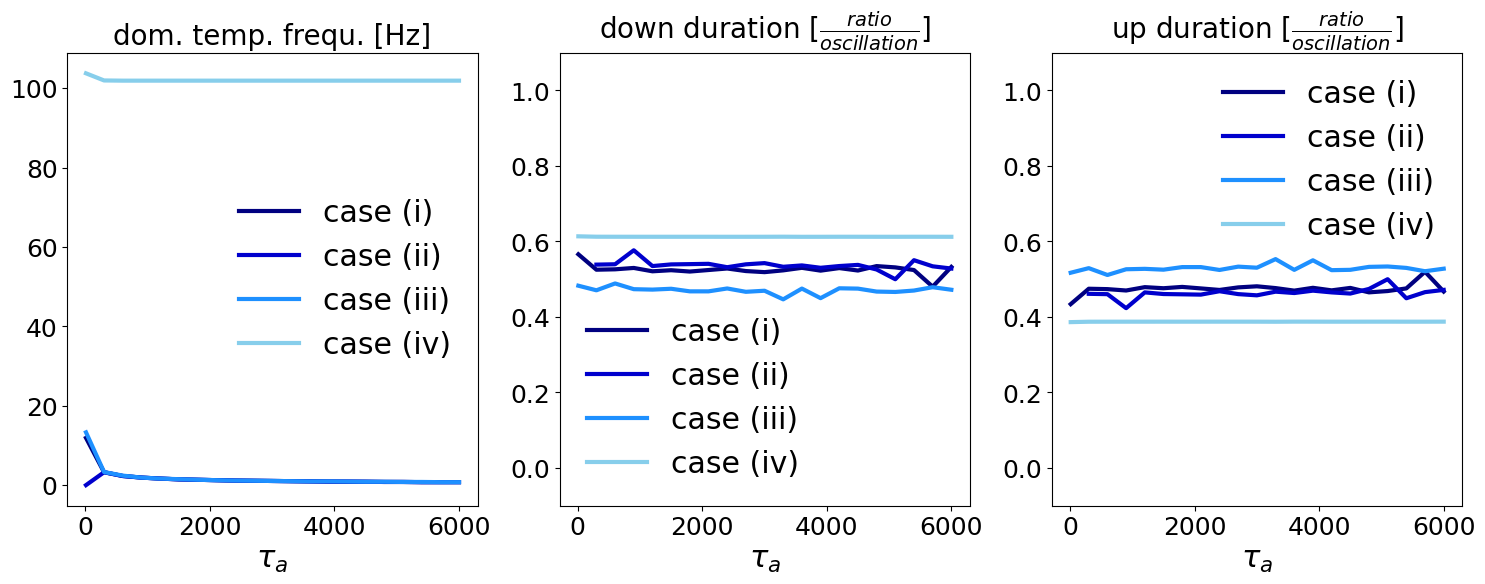

In [52]:
plotDataFrames([bi2, bii2, biii2, biv2], [taui2, tauii2, tauiii2, tauiv2])

In [54]:
def add_ratio(df_array):
    
    for df in df_array:
        df_down_ratio = df['down_duration'].to_numpy()/(df['down_duration'].to_numpy() + df['up_duration'].to_numpy())
        df_up_ratio = df['up_duration'].to_numpy()/(df['down_duration'].to_numpy() + df['up_duration'].to_numpy())
        
        # Using DataFrame.insert() to add a column
        df.insert(4, "down_duration_ratio", df_down_ratio, True)
        df.insert(6, "up_duration_ratio", df_up_ratio, True)